<a href="https://colab.research.google.com/github/ELISA1220/113-2Programming-language/blob/main/W6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import gdown

# Google Drive 檔案 ID
file_id = "1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q"

# 下載 CSV 檔案
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"
gdown.download(url, output, quiet=False)

# 讀取 CSV 檔案
df = pd.read_csv(output)
print(df.head())  # 顯示前幾行

Downloading...
From: https://drive.google.com/uc?id=1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q
To: /content/data.csv
100%|██████████| 213k/213k [00:00<00:00, 65.8MB/s]

        date_range   current_date  \
0  Mar 21 - Apr 20  June 29, 2022   
1  Jul 23 - Aug 22  June 29, 2022   
2  Nov 23 - Dec 21  June 29, 2022   
3  Apr 21 - May 20  June 29, 2022   
4  Aug 23 - Sep 22  June 29, 2022   

                                         description compatibility      mood  \
0  Money matters will be far more important now t...       Scorpio   Leading   
1  You may start out that long-distance chat with...       Scorpio     Smart   
2  The stars are feeling sexy. Get ready for a lo...        Cancer  Charming   
3  Anyone with an opinion different from yours wi...      Aquarius  Cautious   
4  If tonight doesn't find you in the arms of som...         Aries     Sweet   

    color  lucky_number lucky_time         sign  
0  Copper            60        9pm        aries  
1   Brown            36        2pm          leo  
2    Blue            30       10am  sagittarius  
3   Peach            22        8am       taurus  
4     Red             1        6pm        virg

這是一年內每個月最後一天12星座的占卜，占卜內容有「建議」、「心情」、「顏色」、「幸運數字」、「幸運時間」、「星座」、「匹配度」

1. 不同星座是否有相似的幸運數字與時間？
2. 不同情緒 (mood) 和顏色 (color) 是否影響聚類？



In [ ]:
1.不同星座是否有相似的幸運數字與時間？

Downloading...
From: https://drive.google.com/uc?id=1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q
To: /content/data.csv
100%|██████████| 213k/213k [00:00<00:00, 65.9MB/s]

        date_range   current_date  \
0  Mar 21 - Apr 20  June 29, 2022   
1  Jul 23 - Aug 22  June 29, 2022   
2  Nov 23 - Dec 21  June 29, 2022   
3  Apr 21 - May 20  June 29, 2022   
4  Aug 23 - Sep 22  June 29, 2022   

                                         description compatibility      mood  \
0  Money matters will be far more important now t...       Scorpio   Leading   
1  You may start out that long-distance chat with...       Scorpio     Smart   
2  The stars are feeling sexy. Get ready for a lo...        Cancer  Charming   
3  Anyone with an opinion different from yours wi...      Aquarius  Cautious   
4  If tonight doesn't find you in the arms of som...         Aries     Sweet   

    color  lucky_number lucky_time         sign  
0  Copper            60        9pm        aries  
1   Brown            36        2pm          leo  
2    Blue            30       10am  sagittarius  
3   Peach            22        8am       taurus  
4     Red             1        6pm        virg

KeyError: 12

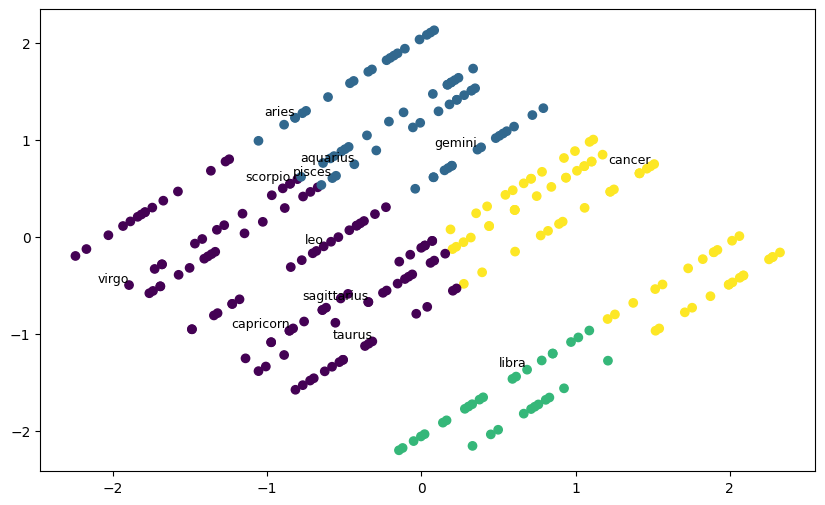

In [16]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 下載 CSV 檔案
file_id = "1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"
gdown.download(url, output, quiet=False)

# 讀取 CSV 檔案
df = pd.read_csv(output)

# 檢查資料結構，查看欄位名稱
print(df.head())

# 檢查缺失值
print(df.isnull().sum())

# 填補缺失值 (可選)
df.fillna({'mood': 'Unknown', 'color': 'Unknown'}, inplace=True)

# 數字欄位處理：將lucky_time轉換成數字，將mood與color轉換為one-hot encoding
time_mapping = {'9pm': 21, '2pm': 14, '10am': 10, '8am': 8, '6pm': 18, '11am': 11, '2am': 2, '5pm': 17, '12am': 0}
df['lucky_time'] = df['lucky_time'].map(time_mapping)

# 檢查映射結果
print(df['lucky_time'].unique())

# mood 和 color 轉換為 one-hot encoding
mood_dummies = pd.get_dummies(df['mood'], prefix='mood')
color_dummies = pd.get_dummies(df['color'], prefix='color')

# 合併 one-hot 編碼後的數據
df = pd.concat([df, mood_dummies, color_dummies], axis=1)

# 2. 處理缺失值 (NaN)
df = df.dropna(subset=['lucky_number', 'lucky_time'])

# 3. 將數字欄位標準化處理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['lucky_number', 'lucky_time']])

# 4. 聚類分析 (KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# 5. PCA降維
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 6. 加入PCA結果到DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 7. 可視化
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', marker='o')

# 標註每個點的星座名稱，避免重疊
for i, sign in enumerate(df['sign']):
    plt.text(df['PCA1'][i], df['PCA2'][i], sign, fontsize=9, ha='right', va='bottom')

plt.title('PCA Visualization of Zodiac Signs Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

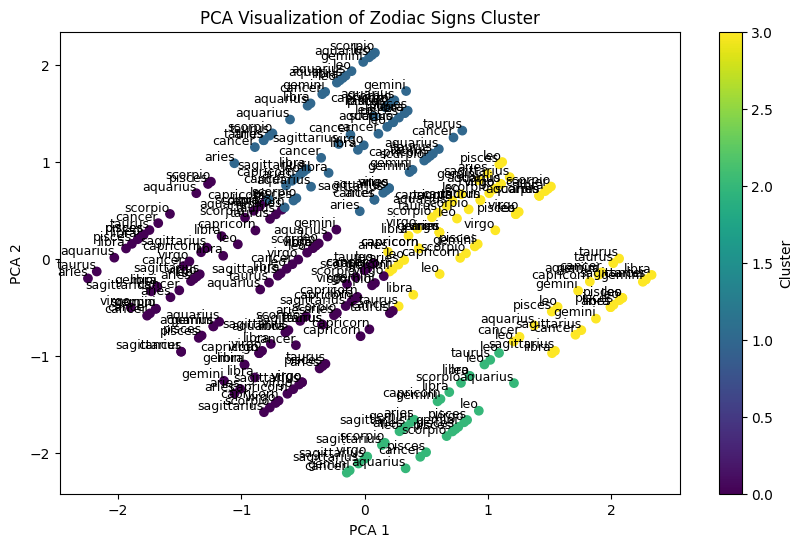

In [17]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ... (rest of your code remains the same) ...

# 7. 可視化
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', marker='o')

# 標註每個點的星座名稱，避免重疊
# Use df.iterrows() to iterate through rows and access values by column name
for index, row in df.iterrows():
    plt.text(row['PCA1'], row['PCA2'], row['sign'], fontsize=9, ha='right', va='bottom')

plt.title('PCA Visualization of Zodiac Signs Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

2. 不同情緒 (mood) 和顏色 (color) 是否影響聚類？

Downloading...
From: https://drive.google.com/uc?id=1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q
To: /content/data.csv
100%|██████████| 213k/213k [00:00<00:00, 73.3MB/s]


        date_range   current_date  \
0  Mar 21 - Apr 20  June 29, 2022   
1  Jul 23 - Aug 22  June 29, 2022   
2  Nov 23 - Dec 21  June 29, 2022   
3  Apr 21 - May 20  June 29, 2022   
4  Aug 23 - Sep 22  June 29, 2022   

                                         description compatibility      mood  \
0  Money matters will be far more important now t...       Scorpio   Leading   
1  You may start out that long-distance chat with...       Scorpio     Smart   
2  The stars are feeling sexy. Get ready for a lo...        Cancer  Charming   
3  Anyone with an opinion different from yours wi...      Aquarius  Cautious   
4  If tonight doesn't find you in the arms of som...         Aries     Sweet   

    color  lucky_number lucky_time         sign  
0  Copper            60        9pm        aries  
1   Brown            36        2pm          leo  
2    Blue            30       10am  sagittarius  
3   Peach            22        8am       taurus  
4     Red             1        6pm        virg

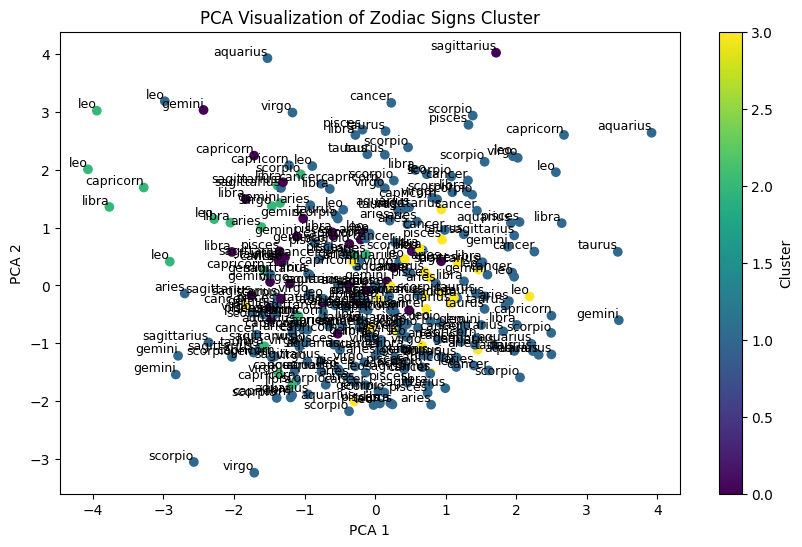

Cluster and Mood distribution:
         mood_Accomplished  mood_Aggressive  mood_Artistic  mood_Attractive  \
cluster                                                                       
0                 0.058824         0.000000            0.0         0.000000   
1                 0.000000         0.018605            0.0         0.004651   
2                 0.000000         0.000000            0.0         0.000000   
3                 0.000000         0.041667            0.0         0.000000   

         mood_Brave  mood_Busy  mood_Calm  mood_Cautious  mood_Charming  \
cluster                                                                   
0          0.029412   0.000000   0.058824       0.000000       0.235294   
1          0.009302   0.018605   0.027907       0.051163       0.000000   
2          0.000000   0.000000   0.000000       0.000000       0.050000   
3          0.041667   0.000000   0.000000       0.000000       0.000000   

         mood_Cherishing  ...  mood_Sweet  

In [18]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 下載 CSV 檔案
file_id = "1998xEYcoei79Xk9mgTxxAh4wIJBCY51Q"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"
gdown.download(url, output, quiet=False)

# 讀取 CSV 檔案
df = pd.read_csv(output)

# 檢查資料結構，查看欄位名稱
print(df.head())

# 1. 數字欄位處理：將lucky_time轉換成數字，將mood與color轉換為one-hot encoding
time_mapping = {'9pm': 21, '2pm': 14, '10am': 10, '8am': 8, '6pm': 18, '11am': 11, '2am': 2, '5pm': 17, '12am': 0}
df['lucky_time'] = df['lucky_time'].map(time_mapping)

# mood 和 color 轉換為 one-hot encoding
mood_dummies = pd.get_dummies(df['mood'], prefix='mood')
color_dummies = pd.get_dummies(df['color'], prefix='color')

# 將 one-hot encoding 的欄位加入原始 DataFrame
df = pd.concat([df, mood_dummies, color_dummies], axis=1)

# 檢查轉換後的結果
print(mood_dummies.head())
print(color_dummies.head())

# 2. 處理缺失值 (NaN)
df = df.dropna(subset=['lucky_number', 'lucky_time'])

# 3. 將數字欄位標準化處理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['lucky_number', 'lucky_time'] + list(mood_dummies.columns) + list(color_dummies.columns)])

# 4. 聚類分析 (KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# 5. PCA降維
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 6. 加入PCA結果到DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 7. 可視化
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', marker='o')

# 標註每個點的星座名稱，避免重疊
for index, row in df.iterrows():
    plt.text(row['PCA1'], row['PCA2'], row['sign'], fontsize=9, ha='right', va='bottom')

plt.title('PCA Visualization of Zodiac Signs Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 8. 檢查聚類與情緒、顏色之間的關係
# 查看每個聚類中，各個情緒和顏色的比例
cluster_mood = df.groupby('cluster')[list(mood_dummies.columns)].mean()
cluster_color = df.groupby('cluster')[list(color_dummies.columns)].mean()

print("Cluster and Mood distribution:")
print(cluster_mood)

print("\nCluster and Color distribution:")
print(cluster_color)


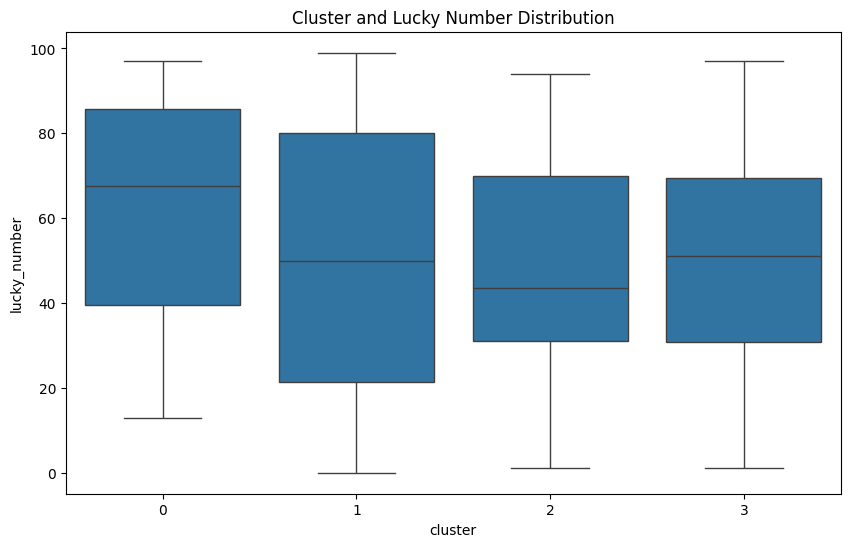

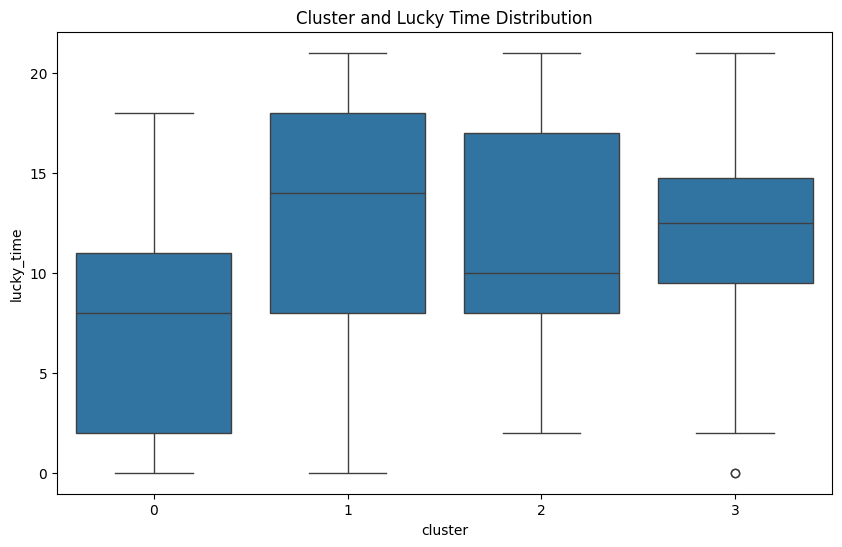

In [20]:
import seaborn as sns  # 確保引入 seaborn 庫

# 箱型圖 - 聚類和 lucky_number 的分佈
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='lucky_number', data=df)
plt.title('Cluster and Lucky Number Distribution')
plt.show()

# 箱型圖 - 聚類和 lucky_time 的分佈
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='lucky_time', data=df)
plt.title('Cluster and Lucky Time Distribution')
plt.show()

<ipython-input-22-c4e92fe35c5a>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # 自動調整圖表佈局


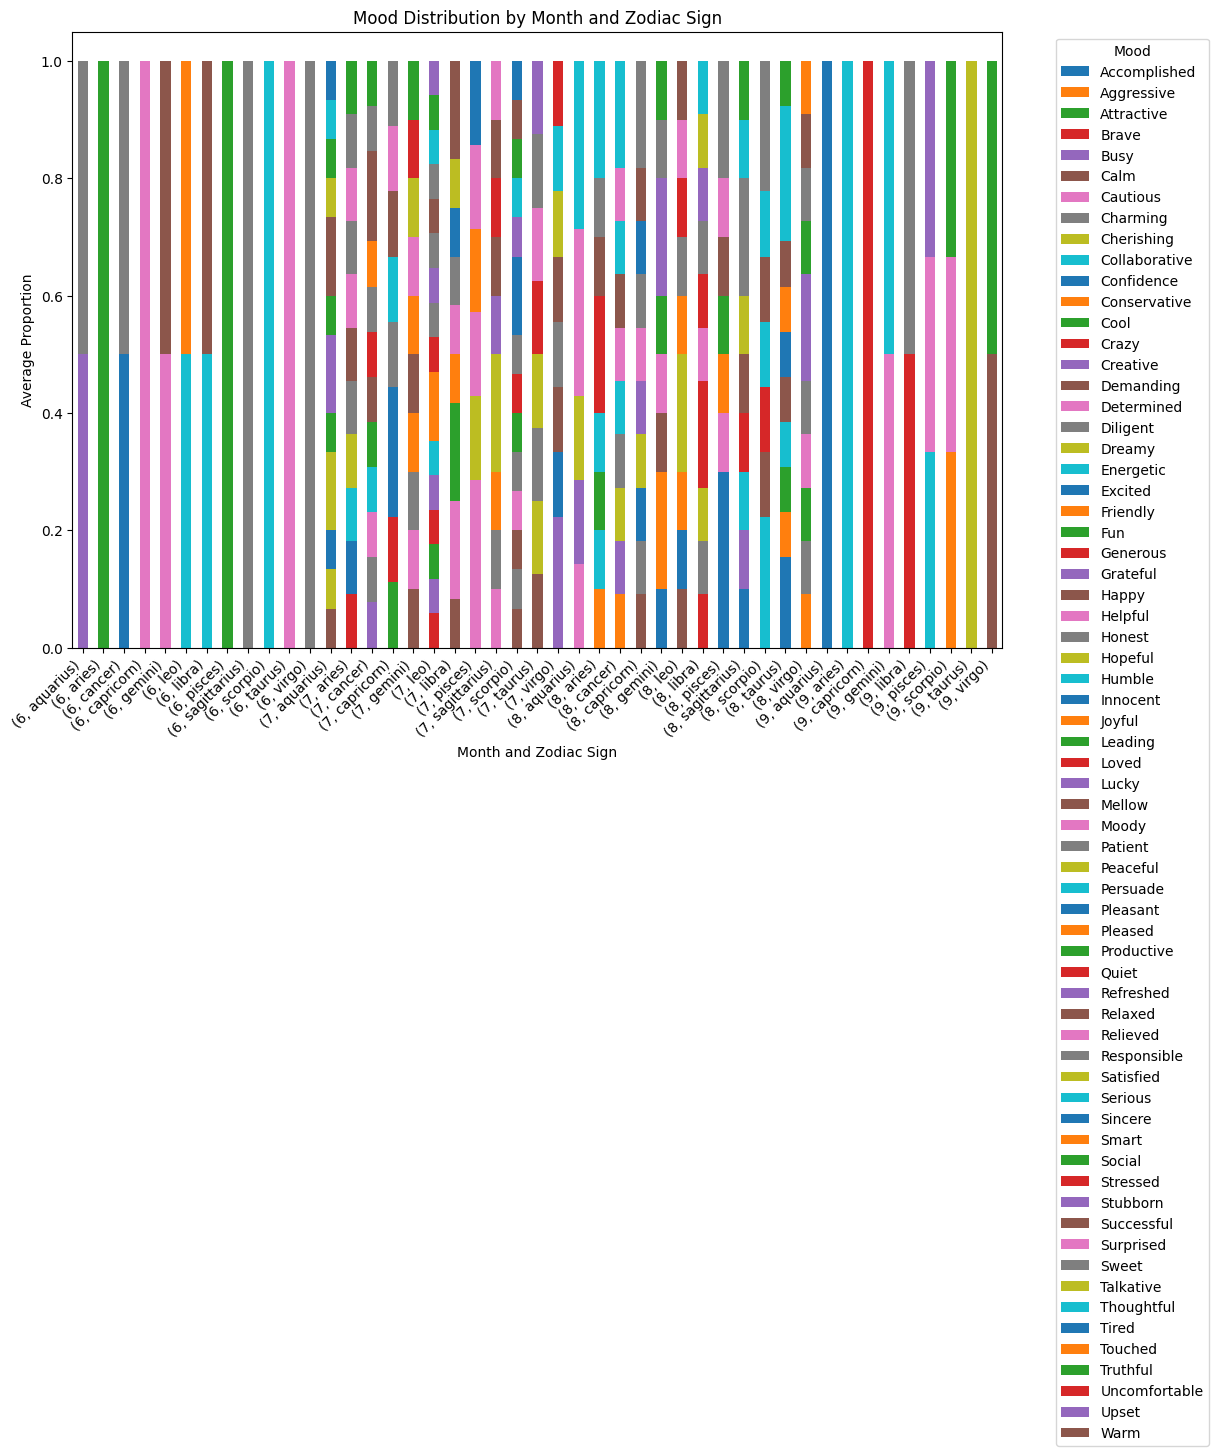

In [22]:
# 提取月份
df['month'] = pd.to_datetime(df['current_date']).dt.month

# 計算每個星座、月份和情緒的分佈
mood_by_month_sign = pd.crosstab(index=[df['month'], df['sign']], columns=df['mood'], normalize='index')

# 繪製條形圖 - 根據情緒、月份和星座分佈
mood_by_month_sign.plot(kind='bar', figsize=(12, 8), stacked=True)

plt.title('Mood Distribution by Month and Zodiac Sign')
plt.xlabel('Month and Zodiac Sign')
plt.ylabel('Average Proportion')
plt.legend(title='Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # 自動調整圖表佈局
plt.show()
